<a href="https://colab.research.google.com/github/dayaniravi123/Machine-Learning-Projects/blob/main/NLP_Problem_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_text




In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np


import tensorflow_text as tf_text
from tensorflow.keras import layers
import re
import string
import nltk
import matplotlib.pyplot as plt


nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning - Tensorflow /NLP - IMDB/IMDB Dataset.csv')

dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
tokenizer = tf_text.UnicodeScriptTokenizer()

db = []

for i in range(100):
  temp = tokenizer.tokenize(dataset['review'][i])
  db.append(temp)

In [7]:
temp = dataset['review'][0]
print(temp)


temp = [c for c in temp if c not in string.punctuation]
temp = ''.join(temp)

stemmer = nltk.porter.PorterStemmer()
temp = ' '.join([stemmer.stem(word) for word in temp.split()])
    
print(temp)


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [4]:
NLP_model = Pipeline([
                      ('counter', CountVectorizer(stop_words='english')),
                      ('tf-idf', TfidfTransformer()),
                      ('svm', SGDClassifier(loss= 'hinge', penalty='l2', alpha= 1e-3, random_state= 42))
                    ])

NLP_model.fit(dataset['review'], dataset['sentiment'])

Pipeline(steps=[('counter', CountVectorizer(stop_words='english')),
                ('tf-idf', TfidfTransformer()),
                ('svm', SGDClassifier(alpha=0.001, random_state=42))])

In [5]:
prediction = NLP_model.predict(dataset['review'])

np.mean(prediction == dataset['sentiment'])

0.84622

In [6]:
NLP_model = Pipeline([
                      ('counter', CountVectorizer(stop_words='english')),
                      ('tf-idf', TfidfTransformer()),
                      ('NNClassifier', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=42))
                    ])

NLP_model.fit(dataset['review'], dataset['sentiment'])



Pipeline(steps=[('counter', CountVectorizer(stop_words='english')),
                ('tf-idf', TfidfTransformer()),
                ('NNClassifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5),
                               random_state=42))])

In [7]:
prediction = NLP_model.predict(dataset['review'])

np.mean(prediction == dataset['sentiment'])

1.0

In [8]:
## Split dataset into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.25, random_state=42)

In [9]:
## Apply Neural network model on train dataset

NLP_model.fit(X_train, y_train)

Pipeline(steps=[('counter', CountVectorizer(stop_words='english')),
                ('tf-idf', TfidfTransformer()),
                ('NNClassifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5),
                               random_state=42))])

In [10]:
## model evaluation 

prediction = NLP_model.predict(X_test)

np.mean(prediction == y_test)

0.8816

In [4]:
res = []
def processing(data):
  tokenizer = tf_text.UnicodeScriptTokenizer()
  ps = PorterStemmer()

  #temp = tokenizer.tokenize(dataset['review'][0])
  temp = tokenizer.tokenize(data)
  temp = [c for c in data if c not in string.punctuation]

  temp = ''.join(temp)
  temp = tokenizer.tokenize(temp)
  temp = [ps.stem(word.numpy().decode('UTF-8').lower()) for word in temp if not word in stopwords.words('english')]

  return temp


In [5]:
db = []
for i in range(100):
    t = processing(dataset['review'][i])
    res += t
    db.append(t)

In [6]:
len(res)

13373

In [8]:
new_res = list(set(res))
len(new_res)

4011

In [10]:
## print sting tokens
new_db = []
for i in range(len(db)):
    t = []
    for j in range(len(db[i])):
        ind = new_res.index(db[i][j])
        t.append(ind)
    new_db.append(t)

In [17]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1)                            
        ])

model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'] )

In [31]:
batch_y = dataset['sentiment'][:100]

In [ ]:
model = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=42)
model.fit(new_db, batch_y)

In [27]:
batch_y

In [4]:
dataset['sentiment'] = dataset['sentiment'].astype('category').cat.codes
dataset['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int8

In [5]:
ds = tf.data.Dataset.from_tensor_slices((dataset['review'],dataset['sentiment']))
ds = ds.batch(32)

In [6]:
train , val = train_test_split(dataset, test_size= 0.2, random_state=42)

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((train['review'],train['sentiment']))
train_ds = train_ds.batch(32)

val_ds = tf.data.Dataset.from_tensor_slices((val['review'], val['sentiment']))
val_ds = val_ds.batch(32)


In [8]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,'[%s]' % re.escape(string.punctuation), '')

vectorize_layer = tf.keras.layers.TextVectorization(standardize = custom_standardization,
                    max_tokens = 10000,
                    output_mode = 'int',
                    output_sequence_length = 250)

def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [9]:
train_text = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [10]:
text_batch, label_batch = next(iter(train_ds))
first_review, first_label = text_batch[0], label_batch[0]

print(vectorize_text(first_review, first_label))

(<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[ 176,   48,   10,  777, 2088,  518,  293,    2,  105, 1906, 1973,
        4243, 6434,    3,  801, 4882,   12,    1,    2,    1,  224,    2,
        6020,   80,  883,   56,   52,   22,  102,    5,    2, 4183,  100,
          36,   25,   37,  117, 1148,   12,    9,    7, 2300, 1169,    6,
         446,   48,  541,    6,   91,   34,   23,   39,  921,  422,    1,
          15,    2,  172,    6, 3089,   24,    1, 4301,   20,    4, 2911,
          12,   45,   74,  222,   73,  123,    8,   81, 3039,  191,   20,
         240,    3,    2,  443,   10,  212, 4947,  141,   21,   62,   27,
          15,    1,   76,  354,  293,    4,   19,   18,    9,  212,   26,
         300,   12,    1,    1,   14,    2, 8662,    1,  115,  439,    3,
           1,    1,   14,    2, 1650,    1,  635,   66,  414,  370,   10,
          89,  116,   48,  112,  382,   34,    1,   35,   18,   43,   10,
          13,   91,  462, 6765,   15,    4,  371,    1, 2045,  

In [11]:
train_ds = train_ds.map(vectorize_text)
val_ds = val_ds.map(vectorize_text)



In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [13]:
model = tf.keras.Sequential([
  layers.Embedding(250 + 1, 16),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          4016      
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
______________________________________________________

In [14]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics = tf.metrics.BinaryAccuracy(threshold=0.0))

In [15]:
history = model.fit(train_ds, validation_data= val_ds, epochs=20)

Epoch 1/20
1250/1250 [==============================] - 13s 9ms/step - loss: 0.6528 - binary_accuracy: 0.6613 - val_loss: 0.5905 - val_binary_accuracy: 0.7329
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5522 - binary_accuracy: 0.7428 - val_loss: 0.5148 - val_binary_accuracy: 0.7637
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5066 - binary_accuracy: 0.7621 - val_loss: 0.4888 - val_binary_accuracy: 0.7701
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.4900 - binary_accuracy: 0.7686 - val_loss: 0.4788 - val_binary_accuracy: 0.7765
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.4831 - binary_accuracy: 0.7719 - val_loss: 0.4748 - val_binary_accuracy: 0.7769
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.4793 - binary_accuracy: 0.7735 - val_loss: 0.4720 - val_binary_accuracy: 0.7769
Epoch 7/20
1250/1250 [=============================

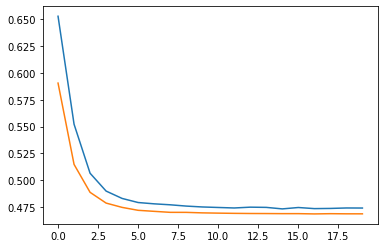

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])